In [1]:
# pip install seaborn
# pip install pandas
# pip install lestpy

In [2]:
import seaborn as sns
import pandas as pd
import lbm_model_dev as lp
from lestpy import outlier

# 1. Les données

## 1.1 Import des données

In [3]:
df = sns.load_dataset('iris')
#df = pd.read_csv('C:/Users/TTfr/Documents/Python/formation_python/iris.csv')

## 1.2 Visualisation rapide des données

In [4]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


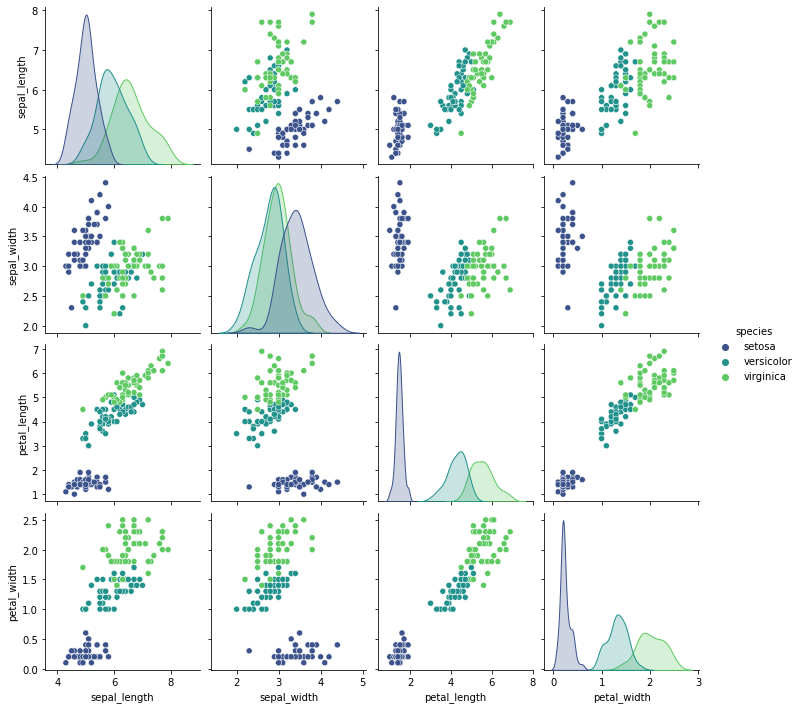

In [6]:
sns.pairplot(df, hue='species', palette='viridis')

In [7]:
for num, species in enumerate(df.species.unique()):
    df['species'][df['species'] == species] = num
df

C:\Users\TTfr\AppData\Local\Temp\ipykernel_6696\1515263718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species'][df['species'] == species] = num


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
y = df.pop('species')
X = df

In [9]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# 2. Modele

In [10]:
model = lp.LBM_Regression()

In [11]:
model.transform(X, y)

method = variable instant
calculé en 0.171 secondes


In [12]:
model.fit()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     485.0
Date:                Wed, 11 May 2022   Prob (F-statistic):           2.17e-92
Time:                        22:24:48   Log-Likelihood:                 47.141
No. Observations:                 150   AIC:                            -80.28
Df Residuals:                     143   BIC:                            -59.21
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             7.4227      0.596     12.447      0.0

In [13]:
model.print_model()

model for target "species"
   Coefficient                                 Parameter  Std Error
0        7.423  Sum of petal_length and petal_width high      0.596
1       -0.113      sepal_length if petal_length average      0.290
2       -1.609       petal_length average if petal_width      0.267
3       -4.333            sepal_width or not petal_width      0.713
4       -1.784          sepal_length and not sepal_width      0.520
5        0.961       petal_length if petal_width average      0.308


species
                R²  adj-R²  calc-Q²
model score  0.953   0.951    0.948


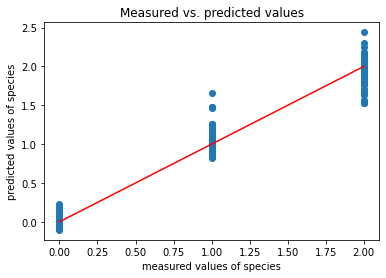

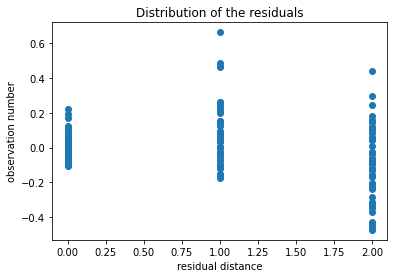

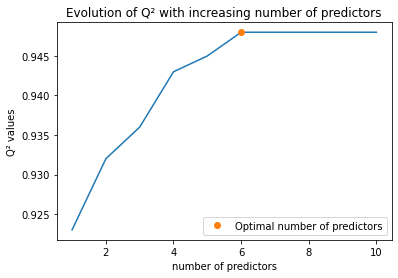

In [14]:
model.describe(X, y)

In [15]:
experimental_domain, mix = model.features_analysis(X)
experimental_domain

{'sepal_length': [None, 4.3, 7.9, None, 'continuous'],
 'sepal_width': [None, 2.0, 4.4, None, 'continuous'],
 'petal_length': [None, 1.0, 6.9, None, 'continuous'],
 'petal_width': [None, 0.1, 2.5, None, 'continuous']}

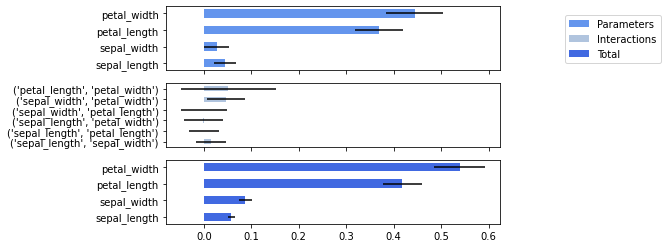

[{'S1': array([0.0453218 , 0.0274656 , 0.3687597 , 0.44398467]),
  'S1_conf': array([0.0228004 , 0.02656956, 0.05074842, 0.06044653]),
  'ST': array([0.05831042, 0.08718561, 0.4177576 , 0.53854975]),
  'ST_conf': array([0.00712318, 0.01380243, 0.04087342, 0.05352227]),
  'S2': array([[        nan,  0.01519424,  0.00137339, -0.00064525],
         [        nan,         nan,  0.00114518,  0.04639255],
         [        nan,         nan,         nan,  0.05212738],
         [        nan,         nan,         nan,         nan]]),
  'S2_conf': array([[       nan, 0.03123938, 0.03194909, 0.04090078],
         [       nan,        nan, 0.0488298 , 0.04011322],
         [       nan,        nan,        nan, 0.10036471],
         [       nan,        nan,        nan,        nan]])}]

In [16]:
model.sensibility_analysis(experimental_domain)

In [17]:
res = model.optimize(target=['maximize'], size=100000)

size = 100000
              Mean of the 5 best results  Best result
sepal_length                       4.493        4.351
sepal_width                        2.033        2.010
petal_length                       6.611        6.818
petal_width                        2.437        2.410
Predspecies                        3.544        3.621
desirability                       0.983        1.000


In [18]:
columns = ["sepal_length",	"sepal_width",	"petal_length",	"petal_width"]
values = [[ 5.1, 3.5, 1.4, 0.2], [5.9, 3.0, 5.1,1.8]]
z = pd.DataFrame(values, columns = columns)
z

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,5.9,3.0,5.1,1.8


In [19]:
model.predict(z)

,Predspecies
0,-0.042728
1,1.713041


In [20]:
OL = outlier.Outliers_Inspection(model)

<!> in development <!>
threshold (4/n) = 0.027
potential outliers : [(64, 0.029651865955265266), (68, 0.030310099882266236), (70, 0.033666360787388765), (72, 0.03979882509997343), (83, 0.050383889380283924), (84, 0.0373023206048741), (100, 0.03274290470359751), (106, 0.2347622244572828), (114, 0.03577149361885969), (118, 0.16399950427177923), (119, 0.03252930201451576), (129, 0.0396272248983378), (131, 0.0370611190848415), (133, 0.03050058332311647), (134, 0.029787474224891974)]
       obs      endog     fitted     Cook's   student.   hat diag    dffits   ext.stud.     dffits
                           value          d   residual              internal   residual           
--------------------------------------------------------------------------------------------------
         0      0.000     -0.043      0.000      0.238      0.020      0.034      0.238      0.034
         1      0.000     -0.040      0.000      0.222      0.021      0.032      0.222      0.032
         2      0.000

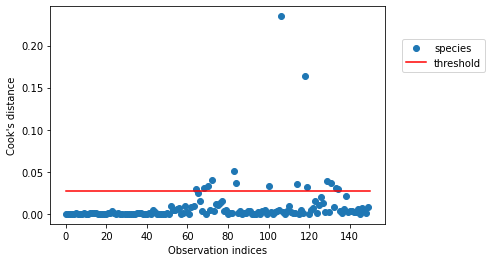

In [21]:
OL.cooks_distance()

<!> in development <!>


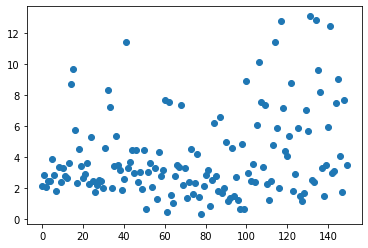

In [22]:
OL.mahalanobis_distance()